In [75]:
import nsfg

import thinkstats2
import thinkplot
df = nsfg.ReadFemResp()

In [76]:
kid_counts=df['numkdhh']


In [77]:
pmf_actual = thinkstats2.Pmf(kid_counts, label='actual')

In [82]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

pmf_observed = BiasPmf(pmf_actual, label='observed')
pmf_observed

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166})

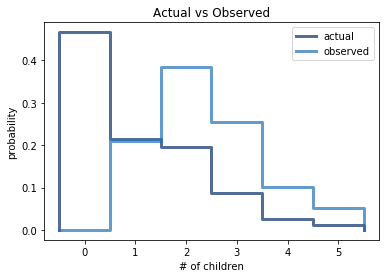

<Figure size 576x432 with 0 Axes>

In [83]:
thinkplot.Pmfs([pmf_actual,pmf_observed])
thinkplot.Show(xlabel='# of children', ylabel='probability', title="Actual vs Observed")

In [81]:
pmf_actual.Mean()

1.024205155043831

In [84]:
pmf_observed.Mean()

2.403679100664282

We can see while the actual number of 0-children households is high, there are no 0-children households observed when children are surveyed. This intuitively makes sense. The observed probability of a single-child household is mostly unchanged from the un-biased survey, while multi-family homes see the largest changes. 